In [19]:
import json
import pandas as pd
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_action_dfs(file_path):
    with open(file_path) as f:
        data = json.load(f)

    action_dfs = {}
    for action in data:
        action_df = pd.json_normalize(data[action])
        if not action_df.empty:
            # Add action type as a column
            action_df['action_type'] = action
            action_dfs[action] = action_df
    return action_dfs

In [2]:
from collections import defaultdict

all_actions = defaultdict(list)

for file_path in ["Data\\compoundV2_transactions_ethereum_chunk_1.json", "Data\\compoundV2_transactions_ethereum_chunk_2.json", "Data\\compoundV2_transactions_ethereum_chunk_4.json"]:
    action_dfs = load_action_dfs(file_path)
    for action, df in action_dfs.items():
        all_actions[action].append(df)

combined_actions = {
    action: pd.concat(dfs, ignore_index=True)
    for action, dfs in all_actions.items()
}

deposits_df = combined_actions.get("deposits")
borrows_df = combined_actions.get("borrows")
repays_df = combined_actions.get("repays")
withdraws_df = combined_actions.get("withdraws")

In [3]:
def preprocess(df):
    df['amountUSD'] = pd.to_numeric(df['amountUSD'], errors='coerce')
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
    df['wallet'] = df['account.id']
    df['asset'] = df['asset.symbol']
    return df

deposits_df = preprocess(deposits_df)
borrows_df = preprocess(borrows_df)
repays_df = preprocess(repays_df)
withdraws_df = preprocess(withdraws_df)

C:\Users\Atharva\AppData\Local\Temp\ipykernel_10856\4108856172.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
C:\Users\Atharva\AppData\Local\Temp\ipykernel_10856\4108856172.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
C:\Users\Atharva\AppData\Local\Temp\ipykernel_10856\4108856172.py:3: FutureWarning: The behavior of 't

In [4]:
deposits_df

,amount,amountUSD,hash,id,timestamp,account.id,asset.id,asset.symbol,action_type,wallet,asset
0,293025918296213842664,294.098362,0xc07a5d8ca08cd1e01a8324d6235da1df7d58720500ce...,0xc07a5d8ca08cd1e01a8324d6235da1df7d58720500ce...,2019-07-03 22:22:36,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,deposits,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,DAI
1,233591042300947866741,236.936134,0x11734b04bcd03f2cde375e4d13fafab9d17eef3d7aef...,0x11734b04bcd03f2cde375e4d13fafab9d17eef3d7aef...,2019-07-03 22:29:50,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,deposits,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,DAI
2,493866984581287182336,498.044019,0xe611412cb9164421a95070e96b041ee12fca19a04aaa...,0xe611412cb9164421a95070e96b041ee12fca19a04aaa...,2019-07-03 22:30:00,0x3eab4037a2e7f4d4d0946c091fe135838221f2b6,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,deposits,0x3eab4037a2e7f4d4d0946c091fe135838221f2b6,DAI
3,300000000,300.000000,0xcb7f5145eb6779cd18789251094f20587e357adb0f6e...,0xcb7f5145eb6779cd18789251094f20587e357adb0f6e...,2019-07-03 22:30:19,0x794ad3af58b56522b80aa7e9bc04f042c55d5b2f,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,deposits,0x794ad3af58b56522b80aa7e9bc04f042c55d5b2f,USDC
4,476901862957734543875,476.020148,0xc0809ef3102b874c7d55aafb6abddf8b8f5cbe743197...,0xc0809ef3102b874c7d55aafb6abddf8b8f5cbe743197...,2019-07-03 22:36:58,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,deposits,0x9e21d7f1d1878be7e4e5f0c8750b09b09414be44,DAI
...,...,...,...,...,...,...,...,...,...,...,...
29995,817000000000000000000,814.541882,0x3b255ac5ed3758304690187f8d83b6864460d10f4762...,0x3b255ac5ed3758304690187f8d83b6864460d10f4762...,2019-09-25 21:03:22,0xb3b50e22f2d7db7838f0888791a7a7fd637e9164,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,deposits,0xb3b50e22f2d7db7838f0888791a7a7fd637e9164,DAI
29996,1000000000000000000,0.996991,0x790c9ed9a5dfc9c27caf2054feac59826a4e934e3494...,0x790c9ed9a5dfc9c27caf2054feac59826a4e934e3494...,2019-09-25 21:03:22,0xb7896fce748396ecfc240f5a0d3cc92ca42d7d84,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,deposits,0xb7896fce748396ecfc240f5a0d3cc92ca42d7d84,DAI
29997,2000000000000000000,341.200000,0xb74e85863bbe88bc6411144553dcf2db10131630d387...,0xb74e85863bbe88bc6411144553dcf2db10131630d387...,2019-09-25 21:03:57,0xb3b50e22f2d7db7838f0888791a7a7fd637e9164,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,deposits,0xb3b50e22f2d7db7838f0888791a7a7fd637e9164,ETH
29998,1174664230590952400,200.397718,0x920203b565895156a5b9e00fae719702510031849689...,0x920203b565895156a5b9e00fae719702510031849689...,2019-09-25 21:06:18,0x69bf12e4aaab9fa44d8ee15cf54bdc4c78c68507,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,deposits,0x69bf12e4aaab9fa44d8ee15cf54bdc4c78c68507,ETH


In [5]:
borrows_df

,amount,amountUSD,hash,id,timestamp,account.id,asset.id,asset.symbol,action_type,wallet,asset
0,118000000000000000,20.914025,0x935a99987e25241eea3b122511d076693e5f9cb24d70...,0x935a99987e25241eea3b122511d076693e5f9cb24d70...,2019-09-10 20:07:31,0xc6e8accdfb5a93e170fcd71e7b662201e536bc68,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,borrows,0xc6e8accdfb5a93e170fcd71e7b662201e536bc68,ETH
1,5000000000000000000000,5092.870371,0x817c1f5701a24dd997ec92d1f5f402c8362dc5140aea...,0x817c1f5701a24dd997ec92d1f5f402c8362dc5140aea...,2019-09-10 20:26:30,0x57ef012861c4937a76b5d6061be800199a2b9100,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,borrows,0x57ef012861c4937a76b5d6061be800199a2b9100,DAI
2,15000000000000000000000,15278.611114,0xbecfc9230af01bf5aa9cbf3ba6f1772a4937d597b862...,0xbecfc9230af01bf5aa9cbf3ba6f1772a4937d597b862...,2019-09-10 20:28:42,0x57ef012861c4937a76b5d6061be800199a2b9100,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,borrows,0x57ef012861c4937a76b5d6061be800199a2b9100,DAI
3,20000000000000000000000,20064.317738,0x83968769a45facb483030ff810f23064567825bcb7ce...,0x83968769a45facb483030ff810f23064567825bcb7ce...,2019-09-10 20:51:24,0xf7c751457363e84f5fda68e527b318468f334cec,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,borrows,0xf7c751457363e84f5fda68e527b318468f334cec,DAI
4,132009718932737100,23.420834,0xa38626e26d0aec40d91e20a3d1b346cd4a88ea5ed0c1...,0xa38626e26d0aec40d91e20a3d1b346cd4a88ea5ed0c1...,2019-09-10 21:37:46,0xe895f40ecf7f32f3c57127c242f961ea93d0470e,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,borrows,0xe895f40ecf7f32f3c57127c242f961ea93d0470e,ETH
...,...,...,...,...,...,...,...,...,...,...,...
29995,200000000000000000000,203.811592,0x63f034ec189677ad35e6fc55dcffd26cdb7aa494ffd7...,0x63f034ec189677ad35e6fc55dcffd26cdb7aa494ffd7...,2020-07-02 00:51:52,0xdc72f401760a8068e8d9b0caccedf8c5801b0711,0x6b175474e89094c44da98b954eedeac495271d0f,DAI,borrows,0xdc72f401760a8068e8d9b0caccedf8c5801b0711,DAI
29996,15000000000000000000,15.285869,0xb4f6a3a5ca0be0036942840b9a38c1936e87ade90b57...,0xb4f6a3a5ca0be0036942840b9a38c1936e87ade90b57...,2020-07-02 00:52:00,0x77b2e217db61a877623cdf3983c6436f9c72426c,0x6b175474e89094c44da98b954eedeac495271d0f,DAI,borrows,0x77b2e217db61a877623cdf3983c6436f9c72426c,DAI
29997,300000000000000000,69.807231,0x9c13b6c9a760d8b40ab25a3765ac12c1e1f40cd42f3e...,0x9c13b6c9a760d8b40ab25a3765ac12c1e1f40cd42f3e...,2020-07-02 00:53:23,0xd6d9d42a6e86f85b52d607ce222798ccca21e881,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,borrows,0xd6d9d42a6e86f85b52d607ce222798ccca21e881,ETH
29998,363000000000000000000,369.918040,0x4f968c41e8088c2ef54dbe082ceecac874d6e8313e35...,0x4f968c41e8088c2ef54dbe082ceecac874d6e8313e35...,2020-07-02 00:54:14,0x43b01a1aafab08f04d79cc5fa97c6836e0147fd4,0x6b175474e89094c44da98b954eedeac495271d0f,DAI,borrows,0x43b01a1aafab08f04d79cc5fa97c6836e0147fd4,DAI


In [6]:
repays_df

,amount,amountUSD,hash,id,timestamp,account.id,asset.id,asset.symbol,action_type,wallet,asset
0,1025002373250536905,180.092917,0xf54e410cfedc417fd0a0c319f565441900064704e66b...,0xf54e410cfedc417fd0a0c319f565441900064704e66b...,2019-10-03 23:36:23,0xf859a1ad94bcf445a406b892ef0d3082f4174088,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,repays,0xf859a1ad94bcf445a406b892ef0d3082f4174088,ETH
1,910868739217714359105,914.103897,0xa16c28bc9428fbe563025b85093d2d33f108180501f3...,0xa16c28bc9428fbe563025b85093d2d33f108180501f3...,2019-10-03 23:53:59,0x6f858d52ff946d3a4c91fe5a7cdc408212d17a1b,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,repays,0x6f858d52ff946d3a4c91fe5a7cdc408212d17a1b,DAI
2,12000399314978437542,2095.629732,0x645fdcd083290424347c0f12e5fd668fe1116255db7c...,0x645fdcd083290424347c0f12e5fd668fe1116255db7c...,2019-10-04 00:37:30,0xf859a1ad94bcf445a406b892ef0d3082f4174088,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,repays,0xf859a1ad94bcf445a406b892ef0d3082f4174088,ETH
3,429190698603386713700,430.573712,0x616e05cb82a75bd294b2747714d17c9032f6191a4bf5...,0x616e05cb82a75bd294b2747714d17c9032f6191a4bf5...,2019-10-04 01:49:49,0x5104efc872d45dba3a97bf02aebe240dfc283321,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,repays,0x5104efc872d45dba3a97bf02aebe240dfc283321,DAI
4,500001047112069060,86.410181,0xa622df3254967398c41557f5f948cf6c6b15c9280067...,0xa622df3254967398c41557f5f948cf6c6b15c9280067...,2019-10-04 02:15:40,0xf859a1ad94bcf445a406b892ef0d3082f4174088,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,repays,0xf859a1ad94bcf445a406b892ef0d3082f4174088,ETH
...,...,...,...,...,...,...,...,...,...,...,...
29995,20000000000,20000.000000,0xfdebc1a74fe3a8623b04609c5435c4a3979a74e3e028...,0xfdebc1a74fe3a8623b04609c5435c4a3979a74e3e028...,2020-07-15 22:41:23,0x0489076a0d17394835af93cd62acff703b6814a9,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,repays,0x0489076a0d17394835af93cd62acff703b6814a9,USDC
29996,1900000000,1900.000000,0x0fc7eff4bbeccb6998d3b778e5a4a36ce4517f3459aa...,0x0fc7eff4bbeccb6998d3b778e5a4a36ce4517f3459aa...,2020-07-15 22:57:22,0x06cb7c24990cbe6b9f99982f975f9147c000fec6,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,repays,0x06cb7c24990cbe6b9f99982f975f9147c000fec6,USDC
29997,1014191630,1014.191630,0x43b1a9f6658e761fad0d91cd14b642edbb1523f75e43...,0x43b1a9f6658e761fad0d91cd14b642edbb1523f75e43...,2020-07-15 23:01:29,0xed76187ad1e4f974229ac9a5aeb2aaa427c5a987,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,repays,0xed76187ad1e4f974229ac9a5aeb2aaa427c5a987,USDC
29998,1012495456,1012.495456,0x1ef219e991fc344776a61c060c43897d56277228a50a...,0x1ef219e991fc344776a61c060c43897d56277228a50a...,2020-07-15 23:05:47,0xed76187ad1e4f974229ac9a5aeb2aaa427c5a987,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,repays,0xed76187ad1e4f974229ac9a5aeb2aaa427c5a987,USDC


In [7]:
withdraws_df

,amount,amountUSD,hash,id,timestamp,account.id,asset.id,asset.symbol,action_type,wallet,asset
0,20000000000000000000000,20114.601465,0xa6642c16a927e849c6bce301fe3231d585000c1977da...,0xa6642c16a927e849c6bce301fe3231d585000c1977da...,2019-08-01 09:20:25,0xabeab690bd56d307f4bb3b59c2f209c353ee057d,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,withdraws,0xabeab690bd56d307f4bb3b59c2f209c353ee057d,DAI
1,1000001208311796243603,214276.079668,0xa4006236e45deff63bd374ca4eb32506a2d191a11d1c...,0xa4006236e45deff63bd374ca4eb32506a2d191a11d1c...,2019-08-01 09:25:26,0x3584ca77ba08bd8b3fe4762e60eb284e37696829,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,withdraws,0x3584ca77ba08bd8b3fe4762e60eb284e37696829,ETH
2,7999999815641403,1.714207,0x98f249801871cd44a3dd941ea3f35cbfb0f033c05eb5...,0x98f249801871cd44a3dd941ea3f35cbfb0f033c05eb5...,2019-08-01 09:26:14,0x118ee757dd8841f81903e1c1d7d7aa88e376cc39,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,withdraws,0x118ee757dd8841f81903e1c1d7d7aa88e376cc39,ETH
3,104116698244839162348,104.713295,0x734665212490e662d0d0090fe7def14a21cc5febb7cd...,0x734665212490e662d0d0090fe7def14a21cc5febb7cd...,2019-08-01 09:42:34,0x93fe3b54fafa0ad5c12997fa8fbcb2feaf9a644a,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,withdraws,0x93fe3b54fafa0ad5c12997fa8fbcb2feaf9a644a,DAI
4,596216709206129898,127.754825,0x6eec5c4a94daee03df3ca7f462334414ab98d7e0104e...,0x6eec5c4a94daee03df3ca7f462334414ab98d7e0104e...,2019-08-01 10:06:41,0xe82542051b5e3ef94ce93c7a0473082dd3932bd5,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,withdraws,0xe82542051b5e3ef94ce93c7a0473082dd3932bd5,ETH
...,...,...,...,...,...,...,...,...,...,...,...
29995,4490036535202135622927,4458.369195,0x687fb9ce052f948d47c9cf3ff3e7338a70e3043c2b18...,0x687fb9ce052f948d47c9cf3ff3e7338a70e3043c2b18...,2019-12-30 15:35:19,0x42336826ae2d0cb9ddcdea88dfd023a6b48cd926,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,withdraws,0x42336826ae2d0cb9ddcdea88dfd023a6b48cd926,DAI
29996,6392223445842527936048,6347.140358,0xaca6a00098c5c1e183fdef560fa52eb0c5cfc1a201f9...,0xaca6a00098c5c1e183fdef560fa52eb0c5cfc1a201f9...,2019-12-30 15:35:22,0xa9d43d5b22e5eb975df03f54a90e4d630f448f4b,0x89d24a6b4ccb1b6faa2625fe562bdd9a23260359,DAI,withdraws,0xa9d43d5b22e5eb975df03f54a90e4d630f448f4b,DAI
29997,21001591842335088066,2767.379757,0xb37c4f262c8ecf52e88805b4e44b2520585ad920655c...,0xb37c4f262c8ecf52e88805b4e44b2520585ad920655c...,2019-12-30 15:39:15,0xd2346dbe4fc52ecfdfeaccab5ef1efaa0851c21d,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,withdraws,0xd2346dbe4fc52ecfdfeaccab5ef1efaa0851c21d,ETH
29998,2877474141905635193,379.164768,0x2e4e71a2b5bca36362a8fb916d9da6bbaa5226f75e18...,0x2e4e71a2b5bca36362a8fb916d9da6bbaa5226f75e18...,2019-12-30 15:47:10,0x7de000458b2c9f05b2a778508c6727d9e527c0c4,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,ETH,withdraws,0x7de000458b2c9f05b2a778508c6727d9e527c0c4,ETH


In [9]:
for name, df in zip(["Deposits", "Borrows", "Repays"], [deposits_df, borrows_df, repays_df]):
    print(f"{name}: {len(df):,} transactions, {df['wallet'].nunique():,} unique wallets")

Deposits: 30,000 transactions, 9,033 unique wallets
Borrows: 30,000 transactions, 5,675 unique wallets
Repays: 30,000 transactions, 4,987 unique wallets


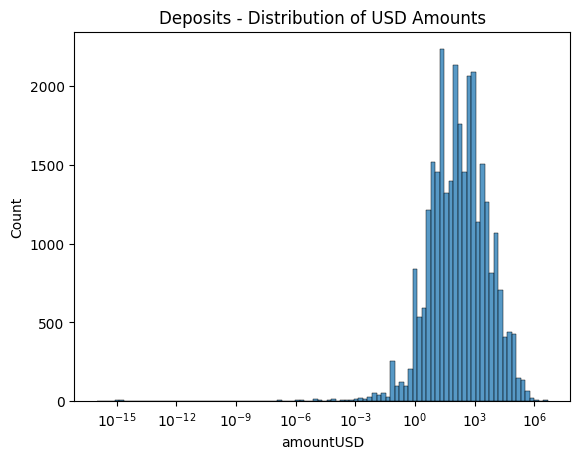

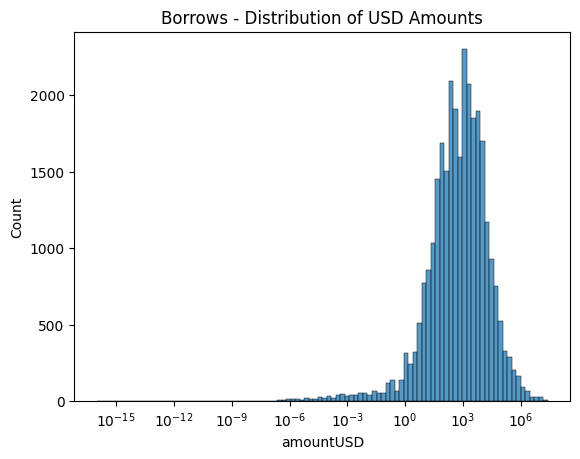

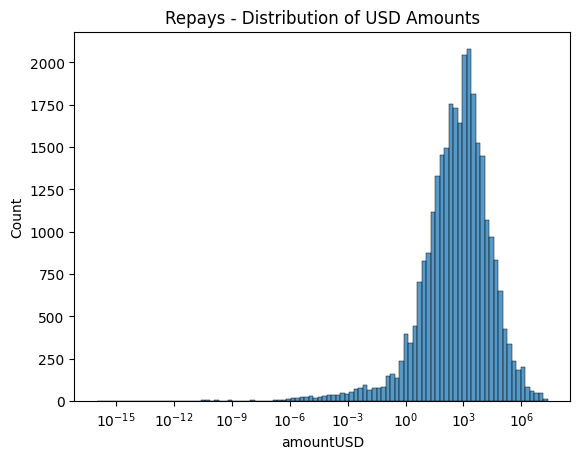

In [11]:
for df, name in zip([deposits_df, borrows_df, repays_df], ["Deposits", "Borrows", "Repays"]):
    sns.histplot(df['amountUSD'].dropna(), bins=100, log_scale=True)
    plt.title(f"{name} - Distribution of USD Amounts")
    plt.xlabel("amountUSD")
    plt.show()

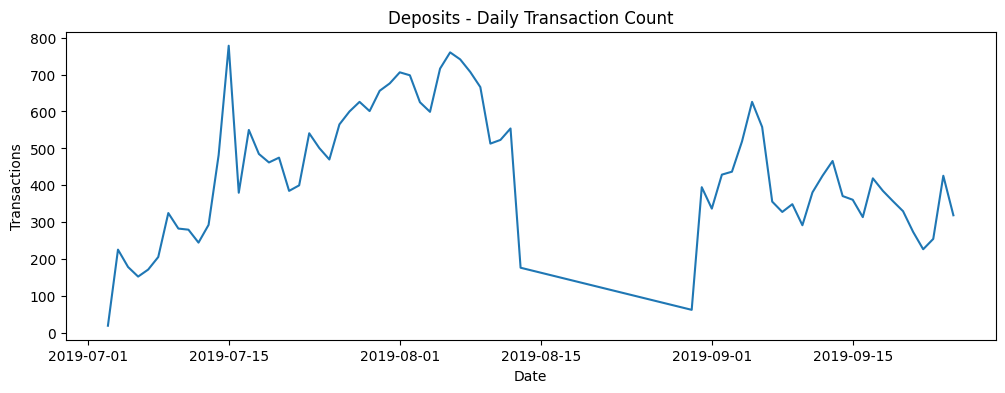

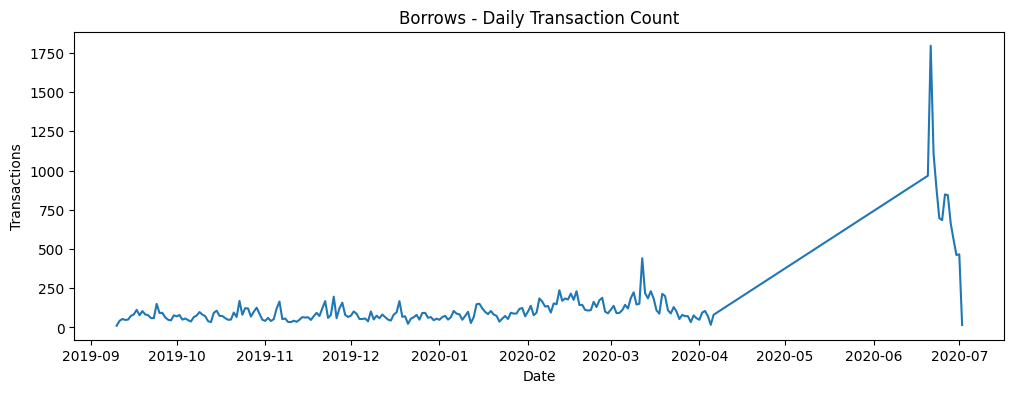

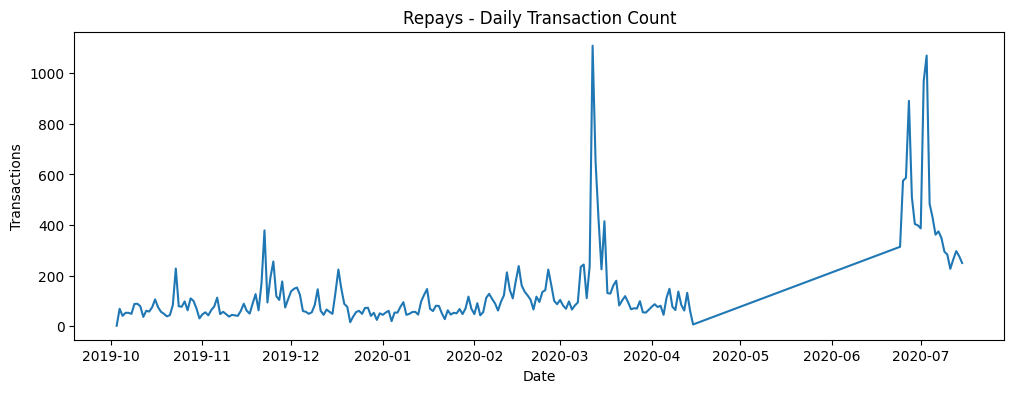

In [12]:
for df, name in zip([deposits_df, borrows_df, repays_df], ["Deposits", "Borrows", "Repays"]):
    df['date'] = df['timestamp'].dt.date
    df.groupby('date').size().plot(title=f"{name} - Daily Transaction Count", figsize=(12, 4))
    plt.xlabel("Date")
    plt.ylabel("Transactions")
    plt.show()

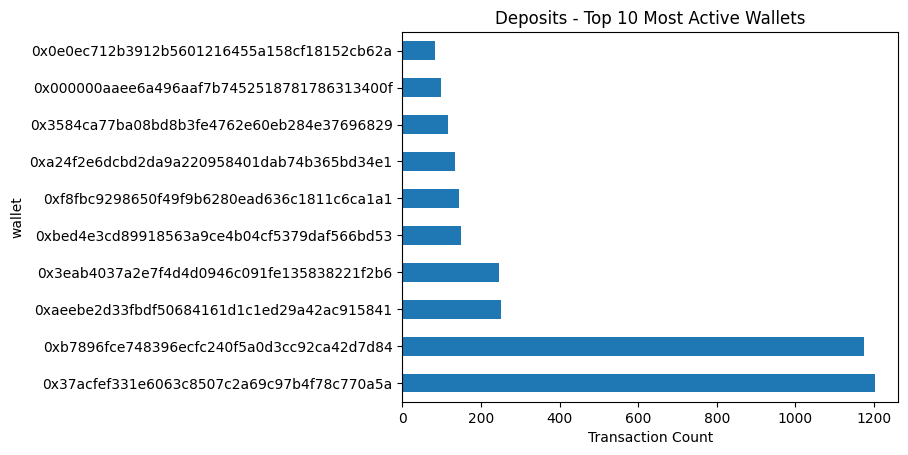

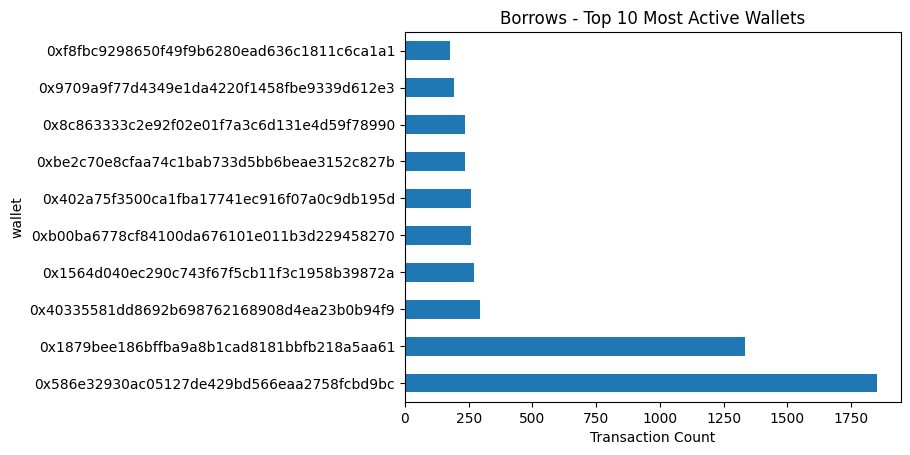

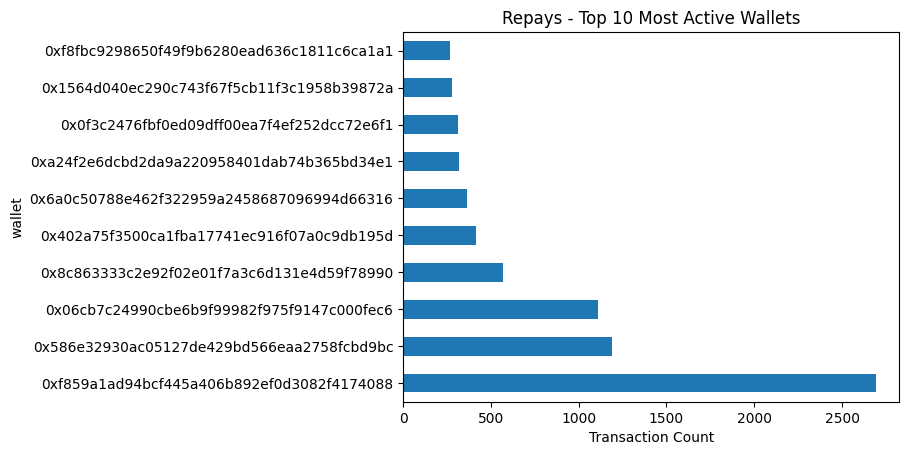

In [13]:
for df, name in zip([deposits_df, borrows_df, repays_df], ["Deposits", "Borrows", "Repays"]):
    df['wallet'].value_counts().head(10).plot(kind='barh')
    plt.title(f"{name} - Top 10 Most Active Wallets")
    plt.xlabel("Transaction Count")
    plt.show()

In [17]:
df_all = pd.concat([
    deposits_df.assign(action="deposit"),
    borrows_df.assign(action="borrow"),
    repays_df.assign(action="repay")
], ignore_index=True)

\n--- DEPOSIT TRANSACTIONS ---
          amountUSD                      timestamp
count  3.000000e+04                          30000
mean   8.078139e+03  2019-08-12 01:31:08.031633408
min    0.000000e+00            2019-07-03 22:22:36
25%    1.778692e+01     2019-07-24 09:43:13.500000
50%    1.701899e+02            2019-08-05 13:13:19
75%    1.499919e+03  2019-09-05 13:16:04.750000128
max    4.711189e+06            2019-09-25 21:07:11
std    5.885566e+04                            NaN


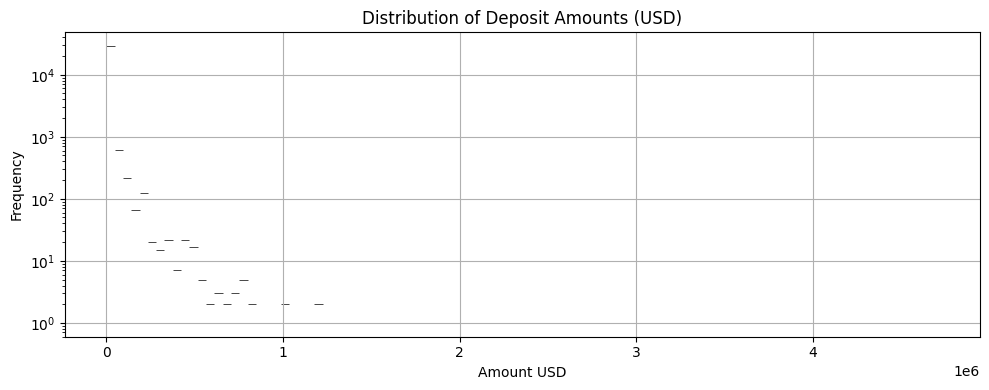

C:\Users\Atharva\AppData\Local\Temp\ipykernel_10856\2194305731.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_action['date'] = df_action['timestamp'].dt.date


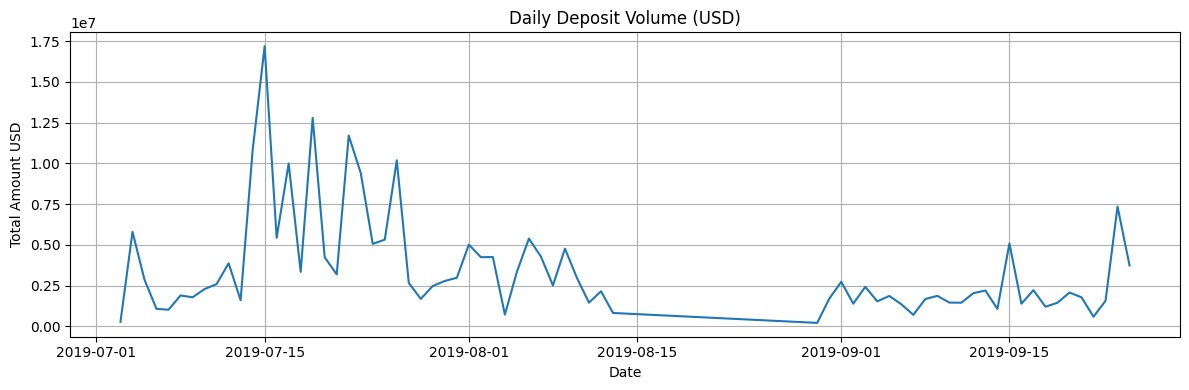

Top 10 Wallets by Deposit Amount (USD):
wallet
0x37acfef331e6063c8507c2a69c97b4f78c770a5a    4.557191e+07
0x3584ca77ba08bd8b3fe4762e60eb284e37696829    1.426862e+07
0xdf63be2e473ba04c26b1609e51d08cf0d78e0913    9.154838e+06
0xc1852f917835a9f2f97112672bc5c8afd1f21dc3    8.889393e+06
0x5d76a92b7cb9e1a81b8eb8c16468f1155b2f64f4    6.714092e+06
0x49b357c9acaa84a0cb978571b642b825e964b2cc    4.711189e+06
0x3c673dd35bfea5267c4f5598a8d441fb13f8475a    4.460965e+06
0x0e0ec712b3912b5601216455a158cf18152cb62a    4.430915e+06
0x320bb16ad49c27825e619a1ce658aeb4bcd68af0    3.799970e+06
0x4becca336d9d7ab7aabddabc7985b26d683f15ea    3.703500e+06
Name: amountUSD, dtype: float64
\n--- BORROW TRANSACTIONS ---
          amountUSD                      timestamp
count  3.000000e+04                          30000
mean   5.199625e+04  2020-03-03 14:56:33.886666496
min    0.000000e+00            2019-09-10 20:07:31
25%    8.631752e+01  2019-12-18 08:21:42.750000128
50%    7.565915e+02            2020-02-27 05:4

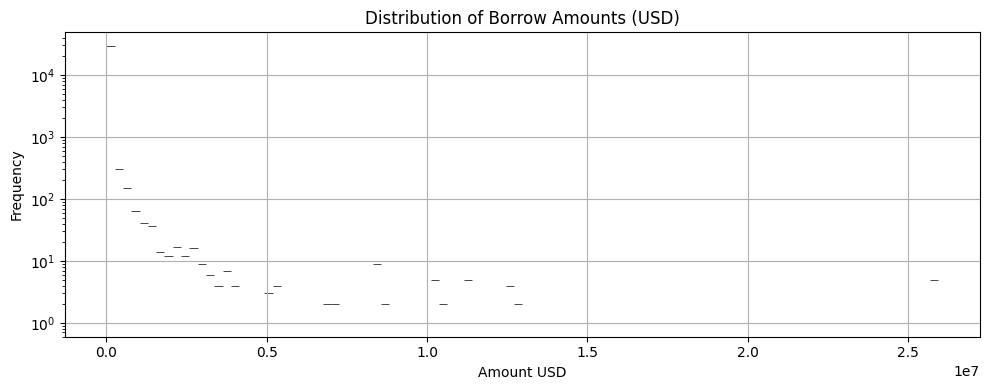

C:\Users\Atharva\AppData\Local\Temp\ipykernel_10856\2194305731.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_action['date'] = df_action['timestamp'].dt.date


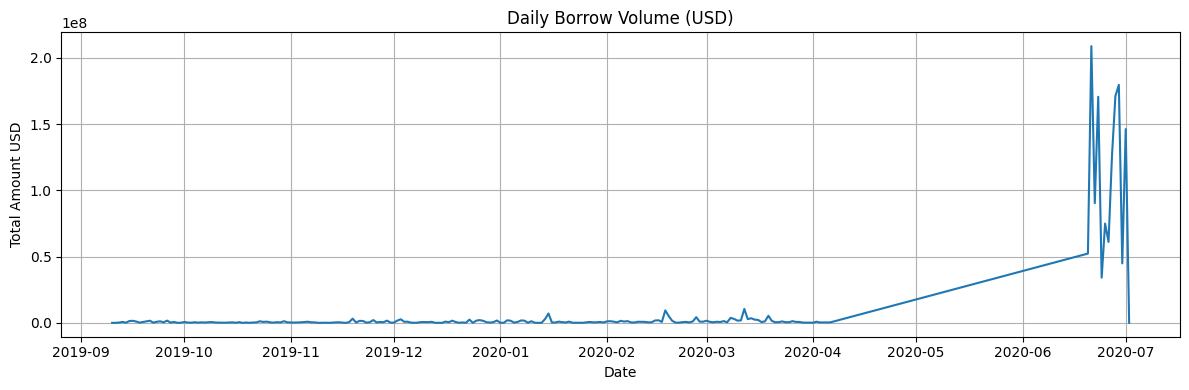

Top 10 Wallets by Borrow Amount (USD):
wallet
0x3ba21b6477f48273f41d241aa3722ffb9e07e247    1.374006e+08
0xab0aed73cdf40af99fd578f8fd72c295b45a9cb1    1.234800e+08
0x1879bee186bffba9a8b1cad8181bbfb218a5aa61    5.320982e+07
0xf7bcd7bb00f4d081775fedef64e92017a10d4b25    5.194006e+07
0x402a75f3500ca1fba17741ec916f07a0c9db195d    5.174547e+07
0xef9f5d6ab172e89462687bdb16633f20ef8198a0    5.103244e+07
0x508b01d1597379ed0f1fb84a00297e193e8daa7a    5.000501e+07
0xff6f7e421cac8b488634c7a8275093a62075a1c6    3.768886e+07
0x853a8cf2cdcb79076f05a557a1064a705ecb7773    3.631511e+07
0x08c8f3bc4cb803ac2cbd10d26ff8ad6370110138    3.621402e+07
Name: amountUSD, dtype: float64
\n--- REPAY TRANSACTIONS ---
          amountUSD                      timestamp
count  3.000000e+04                          30000
mean   7.295956e+04  2020-03-16 11:06:23.979000064
min    0.000000e+00            2019-10-03 23:36:23
25%    5.066000e+01            2020-01-01 06:14:24
50%    6.480000e+02            2020-03-12 16:43:

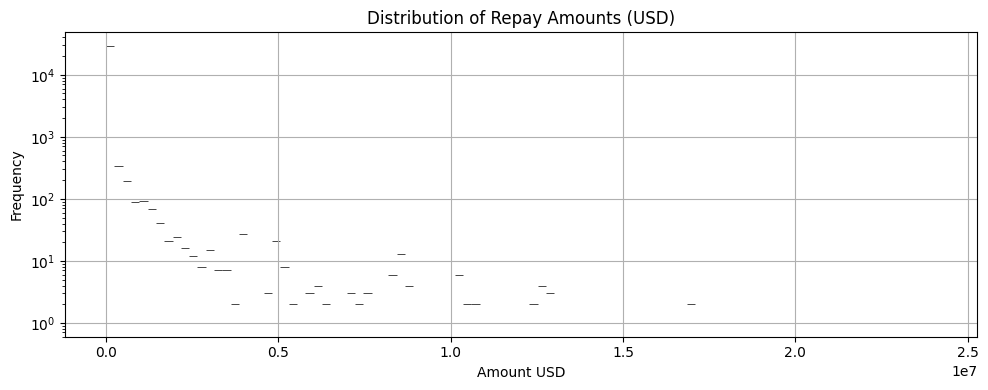

C:\Users\Atharva\AppData\Local\Temp\ipykernel_10856\2194305731.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_action['date'] = df_action['timestamp'].dt.date


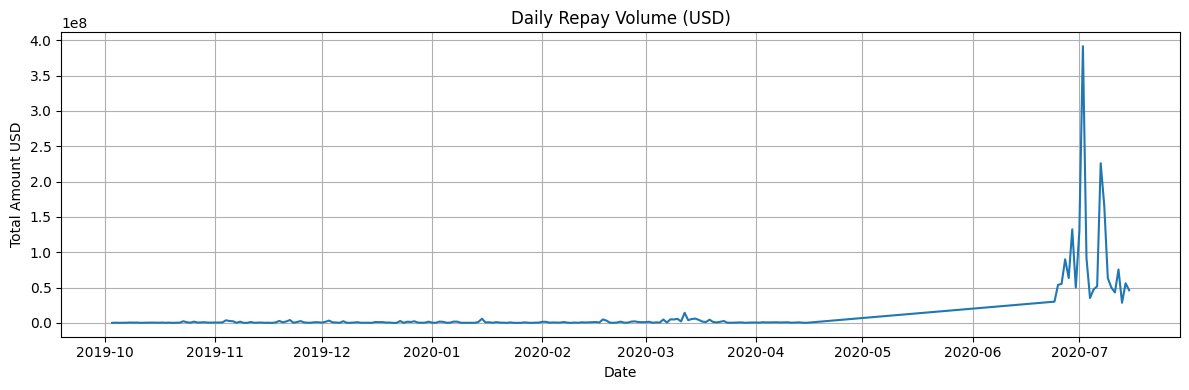

Top 10 Wallets by Repay Amount (USD):
wallet
0x3ba21b6477f48273f41d241aa3722ffb9e07e247    3.792648e+08
0xab0aed73cdf40af99fd578f8fd72c295b45a9cb1    1.542264e+08
0x06cb7c24990cbe6b9f99982f975f9147c000fec6    1.141720e+08
0xef9f5d6ab172e89462687bdb16633f20ef8198a0    1.021769e+08
0x2341fb17fe2435760ac531a3a411ee16116351f2    1.018883e+08
0xd5c69ec78dc59aceb14842d0228b13e181dea9ae    9.536442e+07
0x402a75f3500ca1fba17741ec916f07a0c9db195d    7.781722e+07
0x964d9d1a532b5a5daeacbac71d46320de313ae9c    5.486368e+07
0xb15fd1808c936d27ee72e52d1ecf106d8f4830a6    4.980228e+07
0xf7bcd7bb00f4d081775fedef64e92017a10d4b25    4.778951e+07
Name: amountUSD, dtype: float64
\n--- WITHDRAW TRANSACTIONS ---
       amountUSD timestamp
count        0.0         0
mean         NaN       NaT
min          NaN       NaT
25%          NaN       NaT
50%          NaN       NaT
75%          NaN       NaT
max          NaN       NaT
std          NaN       NaN


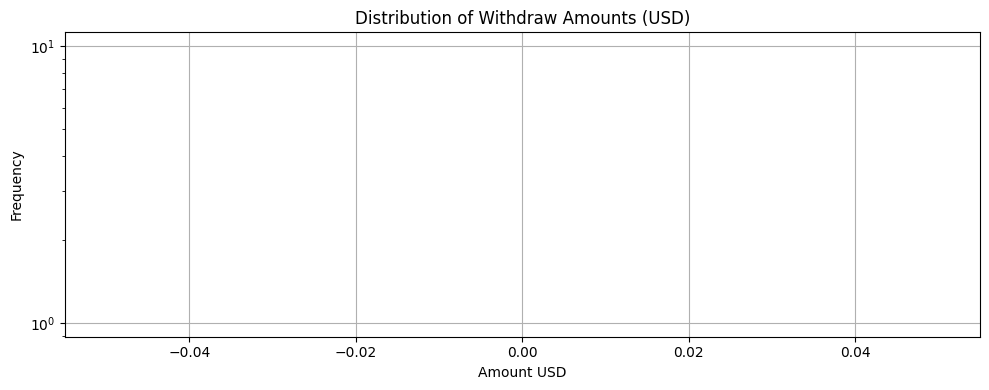

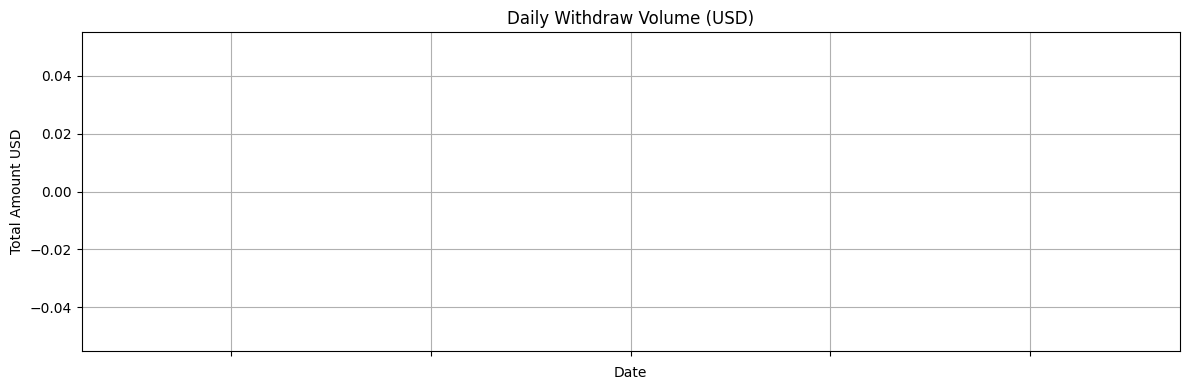

Top 10 Wallets by Withdraw Amount (USD):
Series([], Name: amountUSD, dtype: float64)


In [18]:
actions = ['deposit', 'borrow', 'repay', 'withdraw']
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'], unit='s')

for action in actions:
    df_action = df_all[df_all['action'] == action]

    print(f"\\n--- {action.upper()} TRANSACTIONS ---")
    print(df_action.describe())

    # Amount distribution
    plt.figure(figsize=(10, 4))
    sns.histplot(df_action['amountUSD'], bins=100, log_scale=(False, True))
    plt.title(f'Distribution of {action.title()} Amounts (USD)')
    plt.xlabel('Amount USD')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Time-based volume
    df_action['date'] = df_action['timestamp'].dt.date
    daily_volume = df_action.groupby('date')['amountUSD'].sum()

    plt.figure(figsize=(12, 4))
    daily_volume.plot()
    plt.title(f'Daily {action.title()} Volume (USD)')
    plt.xlabel('Date')
    plt.ylabel('Total Amount USD')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Top wallets by total amount
    top_wallets = df_action.groupby('wallet')['amountUSD'].sum().sort_values(ascending=False).head(10)
    print(f"Top 10 Wallets by {action.title()} Amount (USD):")
    print(top_wallets)

**Feature Engineering**